# TAREA 5 | PUNTO 5 | ECUACIÓN DE ONDA EN 2D:

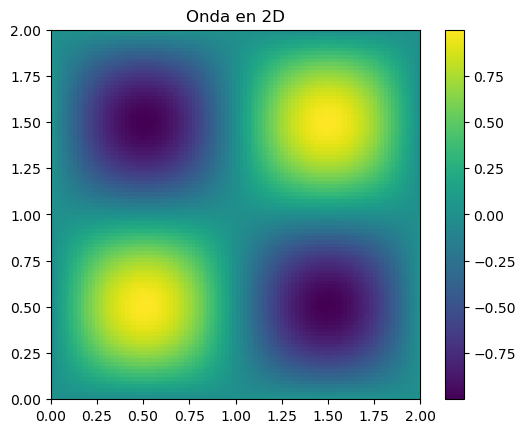

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio

# Parámetros de la simulación
v = np.sqrt(2)  # Velocidad de la onda, v^2 = 2 m/s^2
L = 2           # Dominio cuadrado de 0 a 2 metros
N = 100         # Número de puntos en la cuadrícula en cada dimensión
dx = L / N      # Espaciado de la cuadrícula
dt = 0.005      # Paso de tiempo
T = 3           # Tiempo total de simulación

# Crear cuadrícula espacial
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Condiciones iniciales
u0 = np.sin(np.pi * X) * np.sin(np.pi * Y)
u = np.copy(u0)
u_prev = np.copy(u0)

# Precalcular constantes para la simulación
c = (v * dt / dx) ** 2

# Función para actualizar el estado de la onda
def wave_step(u, u_prev):
    u_new = 2*u - u_prev + c * (
        np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
        np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4*u
    )
    # Aplicar condiciones de contorno (fronteras fijas)
    u_new[0, :] = u_new[-1, :] = u_new[:, 0] = u_new[:, -1] = 0
    return u_new

# Inicializar la figura para la animación
fig, ax = plt.subplots()
img = ax.imshow(u, extent=[0, L, 0, L], origin='lower', cmap='viridis')
plt.colorbar(img, ax=ax)
ax.set_title('Onda en 2D')

# Función de animación para actualizar la trama
def animate(frame):
    global u, u_prev
    u_new = wave_step(u, u_prev)
    img.set_data(u_new)
    u_prev = u
    u = u_new

# Crear animación
anim = FuncAnimation(fig, animate, frames=int(T / dt), interval=dt*1000)

# # Guardar la animación
# gif_path = '/mnt/data/onda_2d.gif'
# anim.save(gif_path, writer='imagemagick', fps=30)

# # Devolver la ruta del archivo GIF
# gif_path
